In [1]:
import pandas as pd

In [134]:
teams_df = pd.read_csv('/content/Teams.csv')
teams_df.head(3)

,team,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards
0,Brazil,1,5,3,1,1,9,4,7,2
1,Spain,2,6,5,0,1,7,2,3,0
2,Portugal,3,4,1,2,1,7,1,8,1


In [115]:
players_df = pd.read_csv('/content/Players.csv')
players_df.head(3)

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0


In [116]:
df = pd.merge(teams_df, players_df)
df.head(3)

,team,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards,surname,position,minutes,shots,passes,tackles,saves
0,Brazil,1,5,3,1,1,9,4,7,2,Baptista,midfielder,82,0,42,1,0
1,Brazil,1,5,3,1,1,9,4,7,2,Daniel Alves,defender,310,11,215,6,0
2,Brazil,1,5,3,1,1,9,4,7,2,Elano,midfielder,140,5,57,6,0


# Shots

In [118]:
# obtenemos el total de shots para cada posición de cada equipo
shots_by_position = df.groupby(['team', 'position'])['shots'].sum().to_frame().reset_index()

# obtenemos un df con el total de shots para cada equipo
total_shots = shots_by_position.groupby('team')['shots'].sum().to_frame().reset_index()
total_shots = total_shots.rename(columns = {'shots': 'total_shots'}) # Renombramos la columna shots por total_shots

# unimos ambos dataframes 
shots_by_position = pd.merge(shots_by_position, total_shots, how = 'inner', on = 'team')

# se obtiene el porcentaje de shots para cada posición de cada equipo
shots_by_position['ratio_shots'] = shots_by_position['shots'] / shots_by_position['total_shots']
shots_by_position = shots_by_position[['team', 'position', 'ratio_shots']]
shots_by_position

,team,position,ratio_shots
0,Algeria,defender,0.161290
1,Algeria,forward,0.225806
2,Algeria,goalkeeper,0.000000
3,Algeria,midfielder,0.612903
4,Argentina,defender,0.115942
...,...,...,...
123,USA,midfielder,0.490909
124,Uruguay,defender,0.071429
125,Uruguay,forward,0.657143
126,Uruguay,goalkeeper,0.000000


# Passes

In [107]:
passes_by_position = df.groupby(['team', 'position'])['passes'].sum().to_frame().reset_index()
passes_by_position

,team,position,passes
0,Algeria,defender,408
1,Algeria,forward,30
2,Algeria,goalkeeper,47
3,Algeria,midfielder,614
4,Argentina,defender,829
...,...,...,...
123,USA,midfielder,614
124,Uruguay,defender,497
125,Uruguay,forward,500
126,Uruguay,goalkeeper,75


In [109]:
total_passes = passes_by_position.groupby('team')['passes'].sum().to_frame().reset_index()
total_passes = total_passes.rename(columns = {'passes': 'total_passes'})


passes_by_position = pd.merge(passes_by_position, total_passes, how = 'inner', on = 'team')
passes_by_position

,team,position,passes,total_passes
0,Algeria,defender,408,1099
1,Algeria,forward,30,1099
2,Algeria,goalkeeper,47,1099
3,Algeria,midfielder,614,1099
4,Argentina,defender,829,2614
...,...,...,...,...
123,USA,midfielder,614,1594
124,Uruguay,defender,497,1974
125,Uruguay,forward,500,1974
126,Uruguay,goalkeeper,75,1974


In [111]:
passes_by_position['ratio_passes'] = passes_by_position['passes'] / passes_by_position['total_passes']
passes_by_position = passes_by_position[['team', 'position', 'ratio_passes']]
passes_by_position

,team,position,ratio_passes
0,Algeria,defender,0.371247
1,Algeria,forward,0.027298
2,Algeria,goalkeeper,0.042766
3,Algeria,midfielder,0.558690
4,Argentina,defender,0.317138
...,...,...,...
123,USA,midfielder,0.385194
124,Uruguay,defender,0.251773
125,Uruguay,forward,0.253293
126,Uruguay,goalkeeper,0.037994


# Mejores equipos

In [121]:
# Calculamos el porcentaje de juegos ganados para cada equipo
porcentaje_juegos_ganados = (df.groupby(['team'])['wins'].sum() / df.groupby(['team'])['games'].sum()).to_frame().reset_index()

# Filtramos para obtener aquellos equipos con un porcentaje de juegos ganados mayor al 50%
mejores_equipos_df = porcentaje_juegos_ganados[porcentaje_juegos_ganados[0] > 0.5 ]
mejores_equipos_shots_per_position = pd.merge(shots_by_position, mejores_equipos_df, how='inner')

# renombramos columnas
mejores_equipos_shots_per_position = mejores_equipos_shots_per_position.rename(columns = {0: 'ratio_wins'})
mejores_equipos_shots_per_position

,team,position,ratio_shots,ratio_wins
0,Argentina,defender,0.115942,0.800000
1,Argentina,forward,0.652174,0.800000
2,Argentina,goalkeeper,0.000000,0.800000
3,Argentina,midfielder,0.231884,0.800000
4,Brazil,defender,0.408451,0.600000
5,Brazil,forward,0.323944,0.600000
6,Brazil,goalkeeper,0.000000,0.600000
7,Brazil,midfielder,0.267606,0.600000
8,Germany,defender,0.045455,0.666667
9,Germany,forward,0.621212,0.666667


In [122]:
mejores_equipos = mejores_equipos_shots_per_position['team'].unique()

In [131]:
for equipo in mejores_equipos:
  print( equipo + ' ' + str(teams_df[teams_df['team'] == equipo].iloc[0, 1]) )

Argentina 7
Brazil 1
Germany 6
Netherlands 4
Spain 2


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

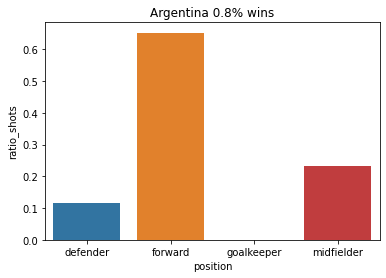

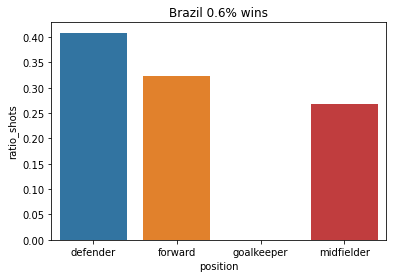

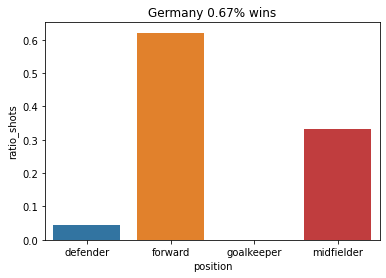

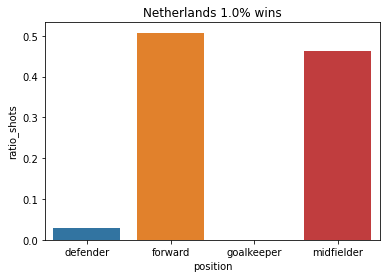

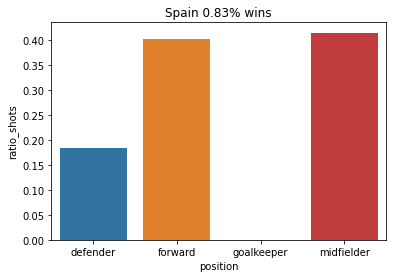

In [103]:
for equipo in mejores_equipos:
  temporal_df = mejores_equipos_shots_per_position[mejores_equipos_shots_per_position['team'] == equipo ]
  sns.barplot(x = 'position', y = 'ratio_shots', data = temporal_df)
  plt.title(equipo + ' ' + str(round(mejores_equipos_df[ mejores_equipos_df['team'] == equipo ].iloc[0, 1], 2)) + '% wins')
  plt.show()

In [112]:
mejores_equipos_passes_per_position = pd.merge(passes_by_position, mejores_equipos_df, how='inner')
mejores_equipos_passes_per_position

,team,position,ratio_passes,0
0,Argentina,defender,0.317138,0.800000
1,Argentina,forward,0.258607,0.800000
2,Argentina,goalkeeper,0.017980,0.800000
3,Argentina,midfielder,0.406274,0.800000
4,Brazil,defender,0.475992,0.600000
5,Brazil,forward,0.121921,0.600000
6,Brazil,goalkeeper,0.028810,0.600000
7,Brazil,midfielder,0.373278,0.600000
8,Germany,defender,0.400633,0.666667
9,Germany,forward,0.190644,0.666667


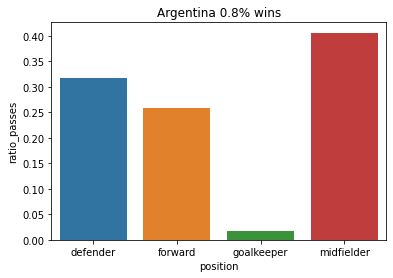

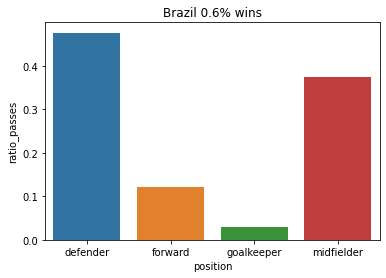

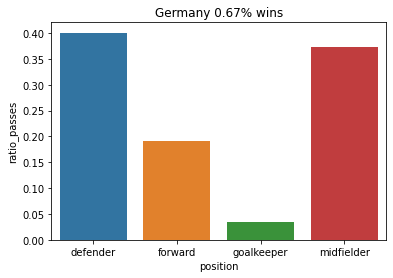

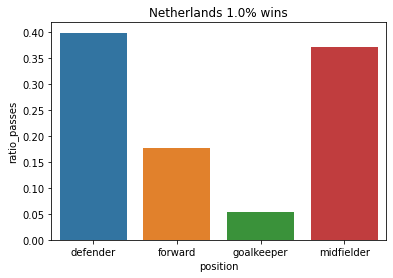

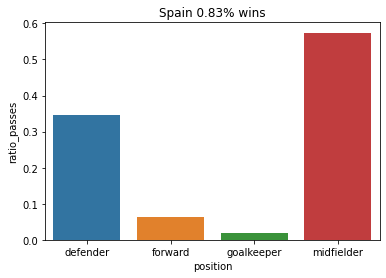

In [113]:
for equipo in mejores_equipos:
  temporal_df = mejores_equipos_passes_per_position[mejores_equipos_passes_per_position['team'] == equipo ]
  sns.barplot(x = 'position', y = 'ratio_passes', data = temporal_df)
  plt.title(equipo + ' ' + str(round(mejores_equipos_df[ mejores_equipos_df['team'] == equipo ].iloc[0, 1], 2)) + '% wins')
  plt.show()